In [1]:
import eeg_decoder
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
np.random.seed(42)
%load_ext autoreload
%autoreload 2

In [4]:
experiment_name = 'B01'
data_dir = f'./data/{experiment_name}'
exp = eeg_decoder.Experiment(experiment_name,data_dir,dev=False)

In [5]:
ss1,ss3 = [11,21],[13,23]
color,ori = [11,13],[21,23]

In [22]:
time_window = 50
time_step = 25
trial_average = 15 
n_splits = 100
group_dict = OrderedDict([('1 Color',[11]),('3 Colors',[13])])

wrangl = eeg_decoder.Wrangler(exp.info['times'],time_window,time_step,trial_average,n_splits,group_dict)
clfr = eeg_decoder.Classification(wrangl,exp.nsub,num_labels=2)

In [23]:
for isub in range(exp.nsub):

    print(isub)
    xdata,ydata = exp.load_eeg(isub)
    xdata,ydata = wrangl.group_labels(xdata,ydata)

    for X_train_all, X_test_all, y_train, y_test in wrangl.bin_and_split_data(xdata,ydata):

        X_train_all, X_test_all, y_train, y_test = wrangl.balance_data(X_train_all, X_test_all, y_train, y_test)
        y_test_shuffle = np.random.permutation(y_test)

        for X_train, X_test in wrangl.roll_over_time(X_train_all, X_test_all):

            clfr.decode(X_train,X_test,y_train,y_test,y_test_shuffle,isub)

interp_color = eeg_decoder.Interpreter(clfr,subtitle='color')
# interp_color.save_results()

0
1
2
3
4
5
6
7
8
9
10
11
12


Significant timepoints: [  88  112  136  160  184  208  232  256  280  304  328  352  376  400
  424  448  472  496  520  544  568  592  616  640  664  688  712  736
  760  784  808  832  856  880  904  928  952  976 1000 1024 1048 1072
 1096 1120 1144 1168 1192]


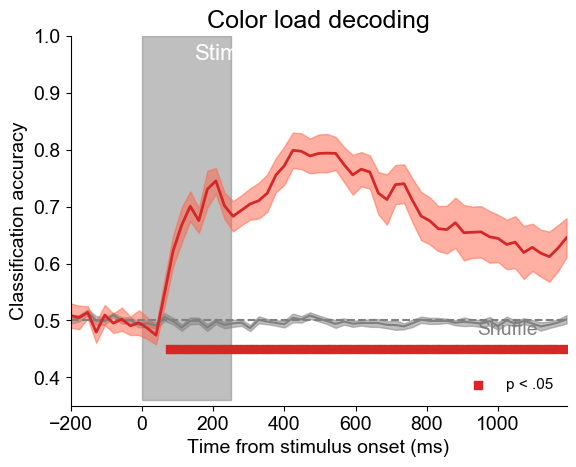

Mean delay accuracy: 0.7031105769230769
Mean delay S.D.: 0.05970238514477331


In [24]:
interp_color.plot_acc(significance_testing=True,savefig=False, ylim=[0.35,1],chance_text_y=.23, title='Color load decoding',subtitle='color_load')

# Orientation

In [25]:
group_dict = OrderedDict([('1 Orientation',[21]),('3 Orientation',[23])])
wrangl = eeg_decoder.Wrangler(exp.info['times'],time_window,time_step,trial_average,n_splits,group_dict)
clfr = eeg_decoder.Classification(wrangl,exp.nsub,num_labels=2)

In [26]:
for isub in range(exp.nsub):

    print(isub)
    xdata,ydata = exp.load_eeg(isub)
    xdata,ydata = wrangl.group_labels(xdata,ydata)

    for X_train_all, X_test_all, y_train, y_test in wrangl.bin_and_split_data(xdata,ydata):

        X_train_all, X_test_all, y_train, y_test = wrangl.balance_data(X_train_all, X_test_all, y_train, y_test)
        y_test_shuffle = np.random.permutation(y_test)

        for X_train, X_test in wrangl.roll_over_time(X_train_all, X_test_all):

            clfr.decode(X_train,X_test,y_train,y_test,y_test_shuffle,isub)

interp_orientation = eeg_decoder.Interpreter(clfr,subtitle='orientation')

0
1


Significant timepoints: [  88  112  136  160  184  208  232  256  280  304  328  352  376  400
  424  448  472  496  520  544  568  592  616  640  664  688  712  736
  760  784  808  832  856  880  904  928  952  976 1024 1048 1072 1096
 1120 1168]


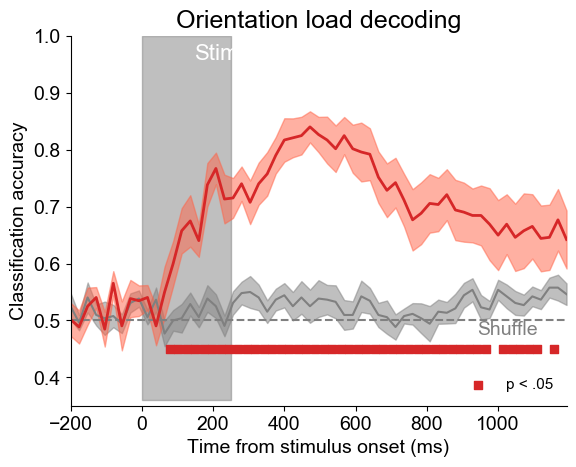

Mean delay accuracy: 0.7292307692307692
Mean delay S.D.: 0.06246034244781424


In [ ]:
interp_orientation.plot_acc(significance_testing=True,savefig=False, ylim=[0.35,1],chance_text_y=.23, title='Orientation load decoding',subtitle='ori_load')

# compare

In [ ]:
# Combine acc matrices for plotting
interp = eeg_decoder.Interpreter(clfr,subtitle='compare')
interp.acc = np.concatenate([interp_orientation.acc[:,np.newaxis],interp_color.acc[:,np.newaxis]],1)
interp.acc_shuff = np.concatenate([interp_orientation.acc_shuff[:,np.newaxis],interp_color.acc_shuff[:,np.newaxis]],1)

Color significant timepoints: [  88  112  136  160  184  208  232  256  280  304  328  352  376  400
  424  448  472  496  520  544  568  592  616  640  664  688  712  736
  760  784  808  832  856  880  904  928  952  976 1024 1048 1072 1096
 1120 1168]
Color mean delay accuracy: 0.7292307692307692
Color mean delay S.D.: 0.06246034244781424
Orientation significant timepoints: [  64   88  112  136  160  184  208  232  256  280  304  328  352  376
  400  424  448  472  496  520  544  568  592  616  640  664  688  712
  736  760  784  808  832  856  880  904  928  952  976 1000 1024 1048
 1072 1096 1120 1144 1168 1192]
Orientation mean delay accuracy: 0.6996153846153846
Orientation mean delay S.D.: 0.058655737674418326


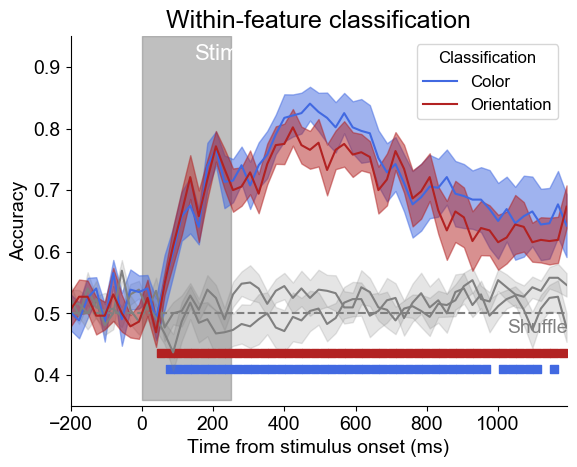

In [ ]:
interp.plot_acc_subset(
    subset_list=['Color','Orientation'],
    ylim=[.35,.95], 
    chance=.5, 
    sig_ys=[.41,.435], 
    chance_text_y=.234,
    significance_testing=True,
    title='Within-feature classification',
    subtitle='within_single_feature',
    savefig=False)